In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
pd.set_option("display.precision", 2)

In [22]:
data = pd.read_table('data.txt',sep='\s+', names=['lp', 'v', 'gtt', 'gtn', 'ggn', 'ts', 'tp', 'hpt','gtci' ,'gtco', 'hpt2', 'gtc1', 'gtc2', 'pexh', 'tic', 'mf', 'gtc3', 'gtt2'], engine='python')
data.count

<bound method DataFrame.count of          lp     v       gtt      gtn      ggn      ts      tp      hpt   gtci  \
0      1.14   3.0    289.96  1349.49  6677.38    7.58    7.58   464.01  288.0   
1      2.09   6.0   6960.18  1376.17  6828.47   28.20   28.20   635.40  288.0   
2      3.14   9.0   8379.23  1386.76  7111.81   60.36   60.36   606.00  288.0   
3      4.16  12.0  14724.40  1547.46  7792.63  113.77  113.77   661.47  288.0   
4      5.14  15.0  21636.43  1924.31  8494.78  175.31  175.31   731.49  288.0   
...     ...   ...       ...      ...      ...     ...     ...      ...    ...   
11929  5.14  15.0  21624.93  1924.34  8470.01  175.24  175.24   681.66  288.0   
11930  6.17  18.0  29763.21  2306.74  8800.35  245.95  245.95   747.40  288.0   
11931  7.15  21.0  39003.87  2678.05  9120.89  332.39  332.39   796.46  288.0   
11932  8.21  24.0  50992.58  3087.43  9300.27  438.02  438.02   892.95  288.0   
11933  9.30  27.0  72775.13  3560.40  9742.95  644.88  644.88  1038.41  288.

In [23]:
random_state = np.random.randint(0, 256)
train_data = data.sample(frac=0.5,random_state=random_state)
test_data = data.drop(train_data.index)

In [24]:
x_train = train_data.iloc[:, 10:14].values
print(x_train)
y_train = train_data.iloc[:, 1]
print(y_train)

[[ 3.586  0.998 18.643  1.041]
 [ 1.299  0.998  7.048  1.019]
 [ 2.956  0.998 15.322  1.035]
 ...
 [ 4.491  0.998 22.441  1.049]
 [ 3.583  0.998 18.63   1.041]
 [ 1.39   0.998  7.544  1.02 ]]
3769    24.0
6669     3.0
2553    21.0
5298    21.0
6473     9.0
        ... 
528     21.0
1666     6.0
2492    27.0
2833    24.0
3557     9.0
Name: v, Length: 5967, dtype: float64


In [25]:
x_test = test_data.iloc[:, 10:14].values
y_test = test_data.iloc[:, 1]

In [26]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.4f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-2.59865129e+01 -2.66453526e-15  7.60409741e+00 -4.75592270e+02]
Mean squared error: 2.16567938
Coefficient of determination: 0.9638


In [27]:
#3
degrees = [1, 4, 8, 16]
train_scores = []
test_scores = []

for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x_train, y_train)
    
    train_scores.append(pipeline.score(x_train, y_train))
    test_scores.append(pipeline.score(x_test, y_test))
    
train_scores, test_scores

([0.9645396144644974,
  0.9906269058174412,
  0.9909685252792452,
  0.3469246837449509],
 [0.9638303362480252,
  0.9905308842902916,
  0.9905238111490627,
  0.3261191460002584])

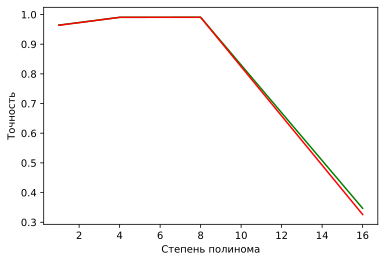

In [28]:
plt.plot(degrees, train_scores, color='green', label="Обучающая выборка")
plt.plot(degrees, test_scores, color='red', label="Тестовая выборка")
plt.xlabel("Степень полинома")
plt.ylabel("Точность")
plt.show()

/Users/danilalbutov/opt/anaconda3/envs/mlEnv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6549.47025795556, tolerance: 35.871755052790334
  positive)
/Users/danilalbutov/opt/anaconda3/envs/mlEnv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4844.36907202082, tolerance: 35.871755052790334
  positive)
/Users/danilalbutov/opt/anaconda3/envs/mlEnv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3601.517464236531, tolerance: 35.871755052790334
  positive)
/Users/danilalbutov/opt/anaconda3/envs/mlEnv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_desce

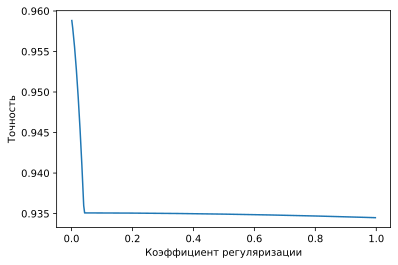

In [29]:
alpha = 0.001
step = 0.003

r2_scores = []
alphas = []

while alpha <= 1:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    
    y_pred = lasso.predict(x_test)
    r2_scores.append(r2_score(y_test, y_pred))
    alphas.append(alpha)
    
    alpha += step
    
plt.plot(alphas, r2_scores, label='R2 scores')
plt.xlabel("Коэффициент регуляризации")
plt.ylabel("Точность")
plt.show()

In [30]:
idxmax = np.argmax(r2_scores)
f'Лучший коэффициент регуляризации: {alphas[idxmax]}'

'Лучший коэффициент регуляризации: 0.001'